In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\Python Project\level1\\turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Unsupervised Machine Learning


Unsupervised learning is where you only have input data (X) and no corresponding output variables.
The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems :
Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
Association: An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

Some popular examples of unsupervised learning algorithms are:
Clusturing :
k-means
Hierarchial

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

<AxesSubplot:xlabel='class', ylabel='count'>

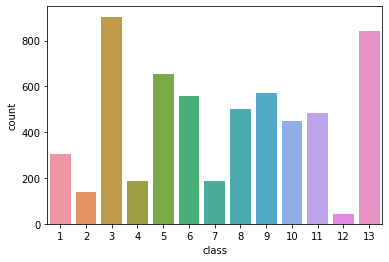

In [4]:
# finding popularity or mode of the class
sns.countplot(x='class', data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

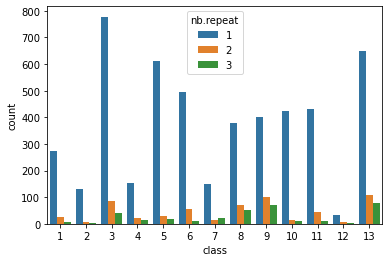

In [5]:
sns.countplot(x='class', hue='nb.repeat', data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

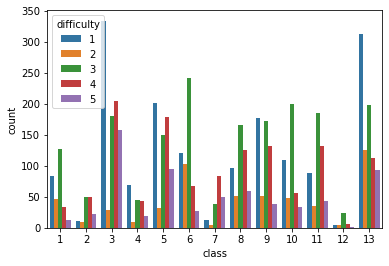

In [6]:
sns.countplot(x='class', hue='difficulty', data=df)

<AxesSubplot:xlabel='difficulty', ylabel='count'>

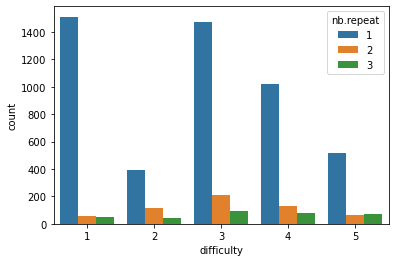

In [7]:
sns.countplot(x='difficulty', hue='nb.repeat', data=df)

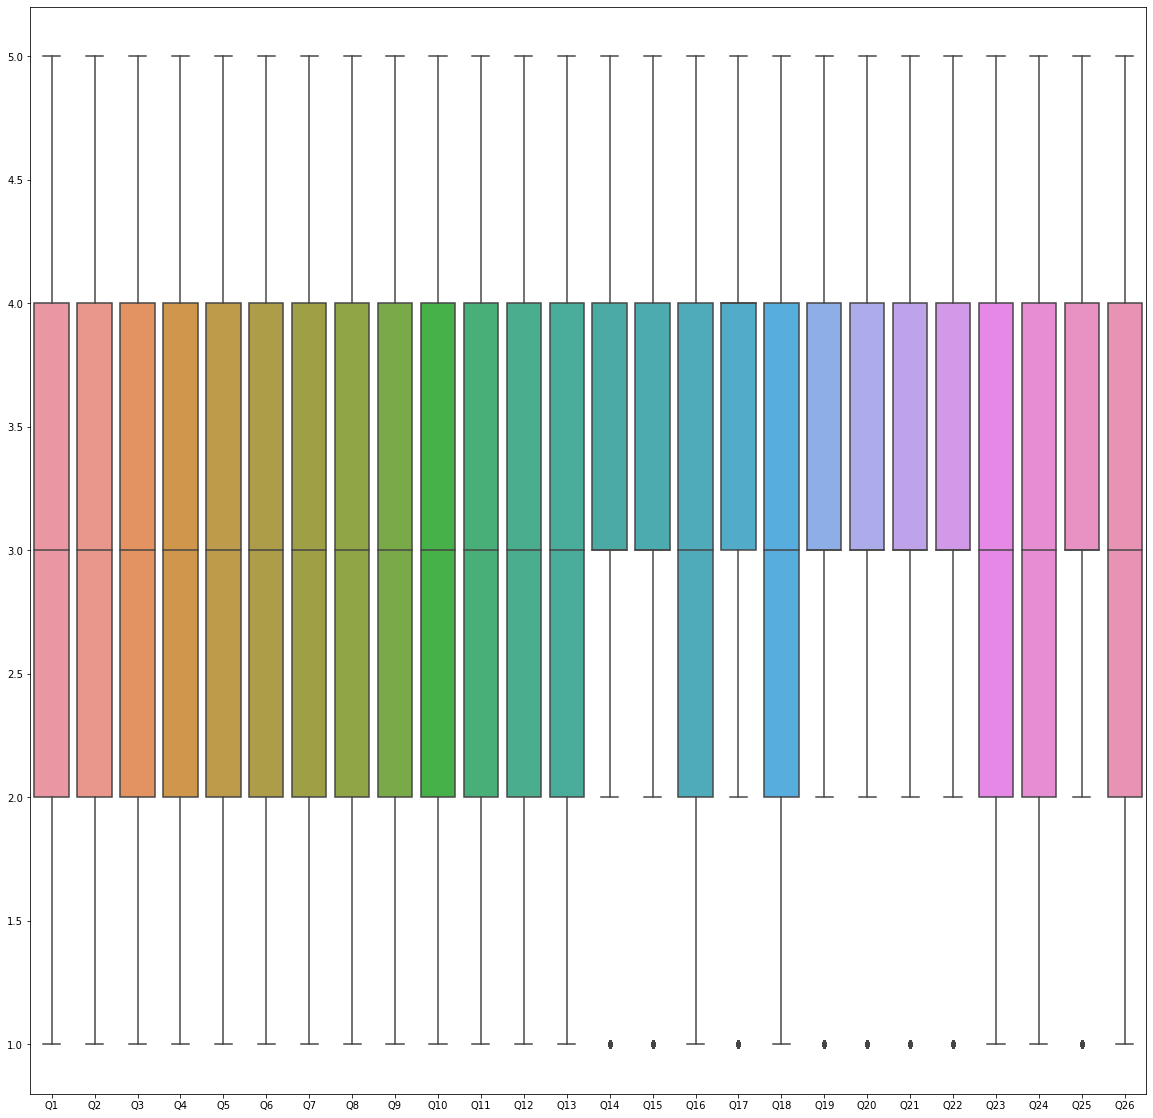

In [8]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df.iloc[:,5:31 ]);

Firstly, we will try to reduce dimensionality.


There are two principal algorithms for dimensionality reduction: Linear Discriminant Analysis ( LDA ) and Principal Component Analysis ( PCA ). The basic difference between these two is that LDA uses information of classes to find new features in order to maximize its separability while PCA uses the variance of each feature to do the same. In this context, LDA can be consider a supervised algorithm and PCA an unsupervised algorithm.

The idea behind PCA is simply to find a low-dimension set of axes that summarize data. Many of these features will measure related properties and so will be redundant. Therefore, we should remove these redundancy and describe each dataset with less properties. This is exactly what PCA aims to do.

In [9]:
df_questions = df.iloc[:,5:33]
#lets do a PCA for feature dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_questions_pca = pca.fit_transform(df_questions)

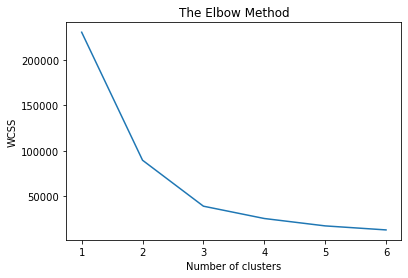

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the Elbow graph , we can go for 3 clusters.



The K-means algorithm identifies k(here k=3) number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

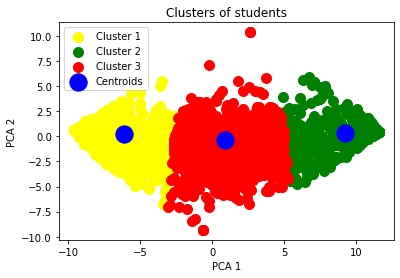

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_questions_pca)

# Visualising the clusters
plt.scatter(df_questions_pca[y_kmeans == 0, 0], df_questions_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(df_questions_pca[y_kmeans == 1, 0], df_questions_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(df_questions_pca[y_kmeans == 2, 0], df_questions_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

Looking at the above graph, we saw 3 clusters of students who have given like Negative, Neutral and Positive feedback

In [12]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_kmeans)

Counter({2: 2359, 0: 2221, 1: 1240})

So we have 2220 students who have given negative ratings overall , 1240 students with positive ratings and 2360 students with nuetral response

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering.

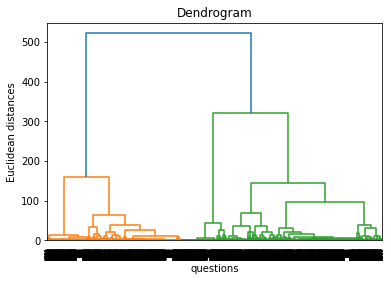

In [13]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

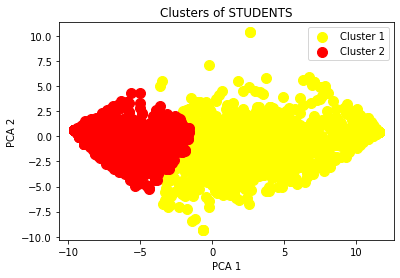

In [14]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_questions_pca)
X = df_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [15]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_hc)

Counter({0: 3502, 1: 2318})

Here, by means of hierarchical clusturing it's found that nearly 2318 students replied negatively and that is near to 2220 found by k-means.